# Шкарбаненко Михаил Б05-907

# Задача 5 (5.1)

Дана выборка

Выборка состоит из трех объектов: X_train, Y_train, X_test

Y_train - изображение (пиксель кодируется черно-белой компонентой изображения), X_train - признаки, соответствующие этому изображению. (элемент X[i,j] соответствует набору признаков для пикселя Y[i,j]).

Требуется:

Провести отбор наиболее значимых признаков и построить регрессию X->Y
Проинтерпетировать признаки (каждый признак является функцией, возможно нелинейной, от значения пикселя)
Получить изображение по X_test (оцениваться будет качество полученного изображения. Ожидается, что регрессия на X_train, Y_train даст R^2>0.85).

# Решение

### Библиотеки

In [836]:
import pandas as pd
from collections import Counter
import itertools
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sn

In [837]:
warnings.filterwarnings('ignore')

In [838]:
x_train = np.load('regression/regression_x_train.npy')
y_train = np.load('regression/regression_y_train.npy')
x_test = np.load('regression/regression_x_test.npy')

### Данные

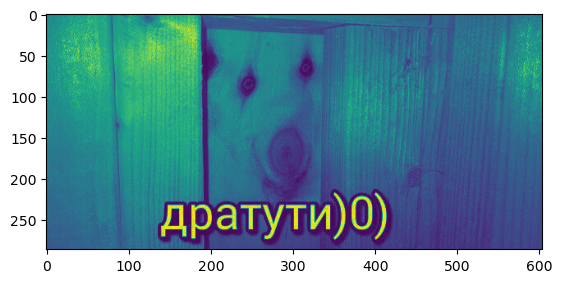

In [839]:
plt.imshow(y_train)
plt.show()

In [840]:
print("Размерности x_train, y_train, x_test: {}, {}, {}".format(x_train.shape, y_train.shape, x_test.shape))
x_train = np.reshape(x_train, (x_train.shape[0]*x_train.shape[1], -1))
x_test = np.reshape(x_test, (x_test.shape[0]*x_test.shape[1], -1))
y_train = np.reshape(y_train, (-1))
print("Преобразованные размерности x_train, y_train, x_test: {}, {}, {}".format(x_train.shape, y_train.shape, x_test.shape))

Размерности x_train, y_train, x_test: (286, 604, 35), (286, 604), (420, 620, 35)
Преобразованные размерности x_train, y_train, x_test: (172744, 35), (172744,), (260400, 35)


### Отбор признаков

Отбор признаков осуществляется с помощью F-теста.

In [841]:
alpha = 0.05
fvalues, pvalues = f_regression(x_train, y_train)
pvalues = r_regression(x_train, y_train)
pvalues.sort()
fvalues.sort()
mask = [x for x in fvalues > 1e2]
x_train = x_train[:, mask]
x_test = x_test[:, mask]
x_train.shape

(172744, 26)

### Обучение модели

In [842]:
model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print("Коэффициент детерминации {}".format(round(score, 2)))

Коэффициент детерминации 0.68


### Получение изображения

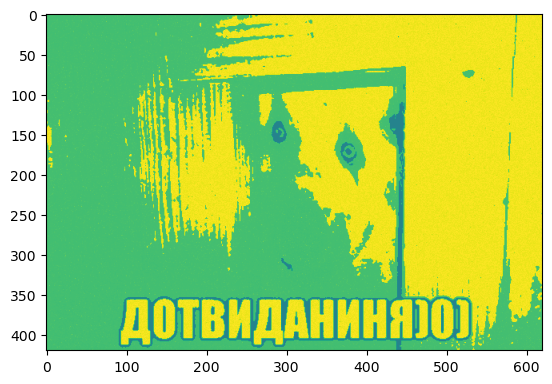

In [843]:
y_test = model.predict(x_test)
plt.imshow(y_test.reshape(420, 620))
plt.show()